##라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize = (12,10))

#전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

#모델링
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier


#
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

<Figure size 864x720 with 0 Axes>

## 데이터 불러오기

In [2]:

from google.colab import drive
drive.mount('content/', force_remount=True)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

data_path = '/content/content/MyDrive/dacon_school/data/'
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test_x.csv')
train_y = train['voted']

Mounted at content/


In [3]:
display(train)

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,1.0,267,1.0,315,1.0,483,1.0,1016,4.0,278,4.0,611,5.0,215,4.0,388,1.0,299,2.0,1915,4.0,439,2.0,823,1.0,309,5.0,586,4.0,2252,10s,2,1,1,Female,3,1,White,Jewish,1,2,6,1,2,6,3,0,6,4,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,2.0,560,2.0,640,1.0,1415,2.0,4494,5.0,1392,2.0,2478,5.0,1268,3.0,843,2.0,1401,4.0,1524,4.0,719,2.0,754,3.0,1118,4.0,654,4.0,1197,30s,2,1,2,Male,1,1,White,Atheist,2,2,2,3,1,3,3,4,1,5,1,2,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,4.0,1253,5.0,1094,1.0,1283,5.0,2209,1.0,1764,5.0,1062,5.0,1489,1.0,1908,4.0,891,1.0,1298,1.0,1200,5.0,473,5.0,1779,3.0,1355,1.0,667,10s,2,1,1,Female,1,1,White,Christian_Other,4,4,2,4,0,1,0,2,1,6,2,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,1328,1.0,599,1.0,650,1.0,1429,5.0,1748,1.0,770,5.0,1025,5.0,742,4.0,4180,3.0,707,1.0,489,1.0,913,4.0,1301,4.0,1680,4.0,737,1.0,1124,40s,4,1,2,Male,3,1,White,Atheist,1,2,0,4,0,1,3,2,2,4,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1


### 열 설명
Q_A / Q_E (a~t) 비식별화를 위해 일부 질문은 Secret 처리

Qa : Secret

Qb : The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.

Qc : Anyone who completely trusts anyone else is asking for trouble.

Qd : Secret

Qe : P.T. Barnum was wrong when he said that there's a sucker born every minute.

Qf : There is no excuse for lying to someone else.

Qg : Secret

Qh : Most people forget more easily the death of their parents than the loss of their property.

Qi : Secret

Qj : It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.

Qk : All in all, it is better to be humble and honest than to be important and dishonest.

Ql : Secret

Qm : It is hard to get ahead without cutting corners here and there.

Qn : Secret

Qo : The best way to handle people is to tell them what they want to hear.

Qp : Secret

Qq : Most people are basically good and kind.

Qr : One should take action only when sure it is morally right.

Qs : It is wise to flatter important people.

Qt : Secret


1=Disagree, 2=Slightly disagree, 3=Neutral, 4=Slightly agree, 5=Agree.



Q_E(a~t) : 질문을 답할 때까지의 시간


age_group : 연령


education : 교육 수준
1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답


engnat : 모국어가 영어
1=Yes, 2=No, 0=무응답


familysize : 형제자매 수


gender : 성별
Male, Female


hand : 필기하는 손
1=Right, 2=Left, 3=Both, 0=무응답


married : 혼인 상태
1=Never married, 2=Currently married, 3=Previously married, 0=Other


race : 인종
Asian, Arab, Black, Indigenous Australian, Native American, White, Other


religion : 종교
Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other


tp__(01~07) : items were rated "I see myself as:" _____ such that

tp01 : Extraverted, enthusiastic.

tp02 : Critical, quarrelsome.

tp03 : Dependable, self-disciplined.

tp04 : Anxious, easily upset.

tp05 : Open to new experiences, complex.

tp06 : Reserved, quiet.

tp07 : Sympathetic, warm.

tp08 : Disorganized, careless.

tp09 : Calm, emotionally stable.

tp10 : Conventional, uncreative.

순서형 변수



urban : 유년기의 거주 구역
1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답




wr_(01~13) : 실존하는 해당 단어의 정의을 앎
1=Yes, 0=No

wf_(01~03) : 허구인 단어의 정의를 앎
1=Yes, 0=No


voted (타겟): 지난 해 국가 선거 투표 여부
1=Yes, 2=No


In [4]:
def show_vote_rate(data,target,element=None):
  target=str(target)
  if element==None:
    element= data[target].unique()
    print(element)
  result=[]
  for e in element:
    y=data.query(target+' == "'+str(e)+'" and voted == "1"').shape[0]
    n=data.query(target+' == "'+str(e)+'" and voted == "2"').shape[0]
    print(e,y,n)
    result.append(y/(y+n))
  print(result)
  plt.bar(element,result)
  plt.show()




---

# 분석







###QxE 데이터들


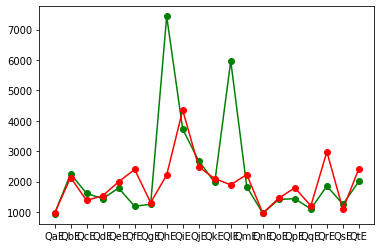

In [5]:
vote_y_data=train.loc[train.voted == 1]
vote_n_data=train.loc[train.voted == 2]
y_times=vote_y_data.iloc[:,2:41:2]
n_times=vote_n_data.iloc[:,2:41:2]
y_mean=y_times.describe().loc['mean']
plt.plot(y_mean,"go-")
n_mean=n_times.describe().loc['mean']
plt.plot(n_mean,"ro-")
plt.show()

데이터가 비이상 적으로 튀는 것을 확인 할 수 있다.

따라서 상위 5%값을 삭제해준다.

In [6]:
display(vote_y_data.loc[:,'QhE'].describe())
print("=====================================")
display(vote_n_data.loc[:,'QhE'].describe())

count    2.063400e+04
mean     7.441106e+03
std      7.456198e+05
min      0.000000e+00
25%      1.104000e+03
50%      1.490000e+03
75%      2.122000e+03
max      1.070860e+08
Name: QhE, dtype: float64

count    2.489800e+04
mean     2.216696e+03
std      1.267777e+04
min      2.500000e+01
25%      1.056000e+03
50%      1.442000e+03
75%      2.064000e+03
max      1.178668e+06
Name: QhE, dtype: float64

In [7]:
#u = np.percentile(vote_y_data,95)

def del_strange_data(data,columns=None,per=95):
  if columns==None:
    columns=list(data.columns)
  cut_lines=dict()
  for key in columns:
    u=np.percentile(data.loc[:,key],per)
    cut_lines[key]=u
  for key in columns:
    data=data[data[key]<cut_lines[key]]
  return data
y_times=del_strange_data(y_times)
n_times=del_strange_data(n_times)



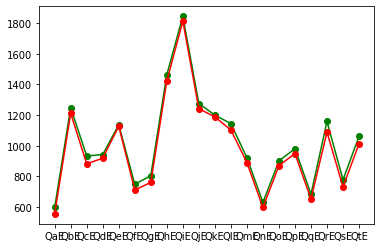

In [8]:
y_mean=y_times.describe().loc['mean']
plt.plot(y_mean,"go-")
n_mean=n_times.describe().loc['mean']
plt.plot(n_mean,"ro-")
plt.show()

소요시간이 길수록 투표할 확률이 높다는 것을 확인 할 수 있었다.

In [9]:
print(y_times.sum(axis=1).describe())
print(n_times.sum(axis=1).describe())

count    12055.000000
mean     20452.859311
std       5415.735656
min        908.000000
25%      16523.500000
50%      20022.000000
75%      23879.000000
max      46304.000000
dtype: float64
count    14781.000000
mean     19725.853393
std       5334.246933
min        730.000000
25%      15946.000000
50%      19267.000000
75%      23105.000000
max      40901.000000
dtype: float64


In [10]:
def plot_to_voted(data, var, target):
    plt.figure(figsize = (8,6))
    for tar in target:
        u = np.percentile(data[data['voted']==tar][var],95)
        d = np.percentile(data[data['voted']==tar][var],5)
        column = [val for val in data[data['voted']==tar][var] if d < val < u]
        print(column)
        sns.distplot(column)
    plt.title(var)
    plt.legend(target)
    plt.show()
cat_columns = list(train.columns[100 <= train.nunique()])
cat_columns.remove('index')
for col in cat_columns:
  plot_to_voted(train, col, train_y.unique())


Output hidden; open in https://colab.research.google.com to view.

[]

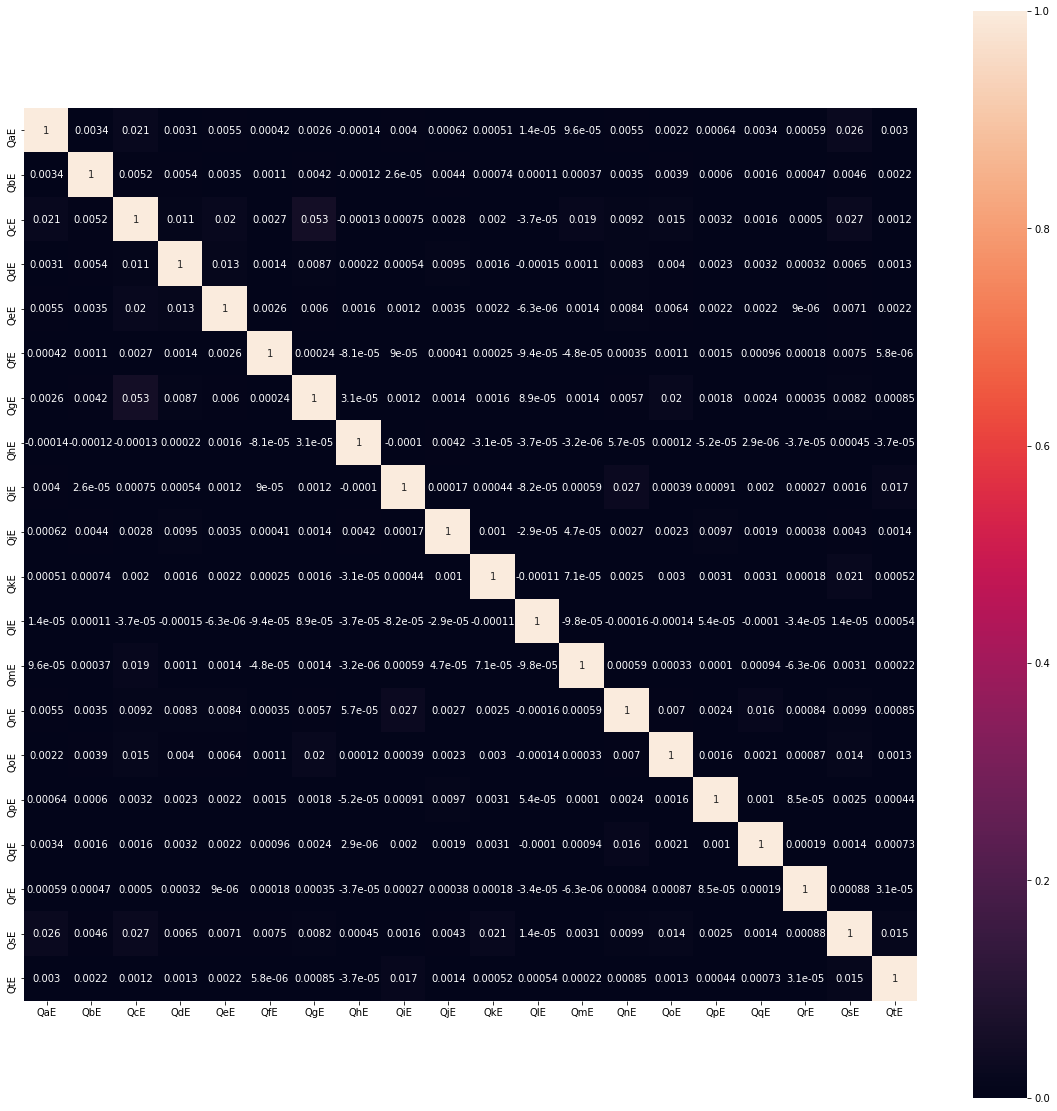

In [11]:
plt.figure(figsize = (20,20))
sns.heatmap(train.loc[:,cat_columns].corr(),square = True, annot = True)
plt.plot()



---


### QxA데이터들

In [12]:
y_an=vote_y_data.iloc[:,1:41:2]
n_an=vote_n_data.iloc[:,1:41:2]
display(y_an)
display(n_an)

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
2,4.0,1.0,1.0,4.0,5.0,1.0,4.0,1.0,3.0,2.0,5.0,5.0,2.0,4.0,2.0,1.0,5.0,4.0,1.0,1.0
3,3.0,3.0,4.0,3.0,1.0,2.0,4.0,3.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0
4,1.0,1.0,5.0,2.0,1.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,2.0,1.0,4.0,5.0,5.0,1.0,2.0
6,1.0,1.0,5.0,4.0,1.0,2.0,5.0,4.0,5.0,1.0,4.0,4.0,1.0,4.0,5.0,2.0,4.0,4.0,3.0,1.0
7,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,4.0,5.0,5.0,1.0,3.0,5.0,1.0,5.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,1.0,4.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,5.0,4.0,5.0,5.0,1.0,1.0,5.0,1.0,3.0,4.0,5.0
45525,1.0,4.0,5.0,1.0,2.0,5.0,1.0,3.0,2.0,4.0,2.0,5.0,5.0,1.0,5.0,4.0,1.0,2.0,4.0,4.0
45529,4.0,1.0,1.0,4.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,5.0,1.0,4.0,1.0,1.0,5.0,5.0,3.0,1.0
45530,1.0,3.0,4.0,2.0,1.0,1.0,1.0,1.0,5.0,1.0,5.0,5.0,4.0,3.0,1.0,1.0,4.0,4.0,4.0,1.0


,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
0,3.0,4.0,5.0,1.0,2.0,5.0,2.0,4.0,5.0,4.0,4.0,4.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,1.0
1,5.0,5.0,3.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,5.0,4.0,1.0,5.0,1.0,5.0,5.0,1.0,4.0,1.0
5,2.0,1.0,4.0,1.0,5.0,2.0,5.0,1.0,3.0,1.0,5.0,1.0,3.0,3.0,1.0,1.0,5.0,1.0,1.0,2.0
10,1.0,1.0,4.0,1.0,3.0,1.0,2.0,4.0,5.0,4.0,4.0,5.0,5.0,1.0,2.0,1.0,3.0,5.0,4.0,3.0
12,2.0,4.0,4.0,3.0,5.0,2.0,2.0,3.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45522,1.0,2.0,2.0,4.0,1.0,1.0,2.0,2.0,4.0,4.0,3.0,5.0,2.0,2.0,4.0,2.0,2.0,4.0,4.0,5.0
45524,2.0,4.0,2.0,2.0,1.0,5.0,4.0,1.0,3.0,4.0,3.0,3.0,2.0,4.0,4.0,5.0,2.0,2.0,4.0,2.0
45526,4.0,5.0,4.0,2.0,3.0,1.0,2.0,1.0,2.0,2.0,5.0,5.0,4.0,2.0,1.0,2.0,4.0,1.0,1.0,1.0
45527,2.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,5.0,4.0,1.0,2.0,4.0,2.0,1.0,5.0,4.0


QaA


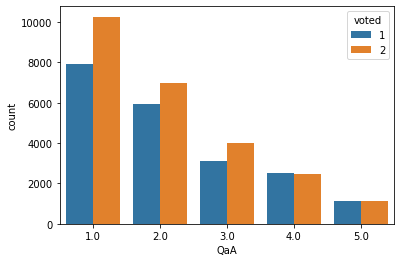

QbA


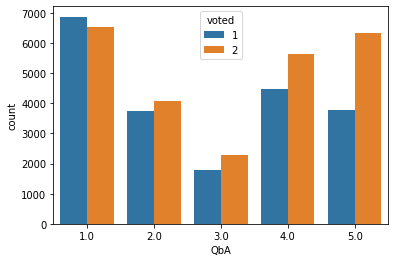

QcA


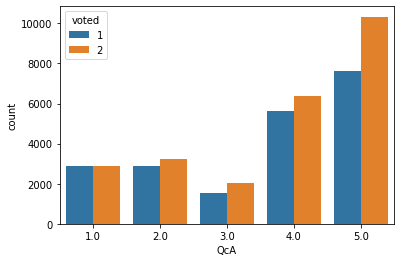

QdA


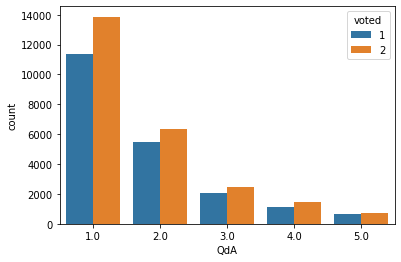

QeA


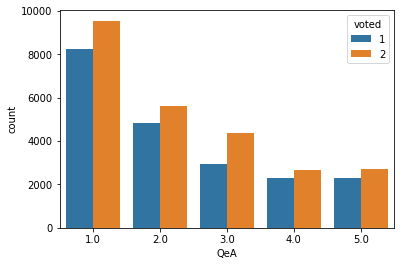

QfA


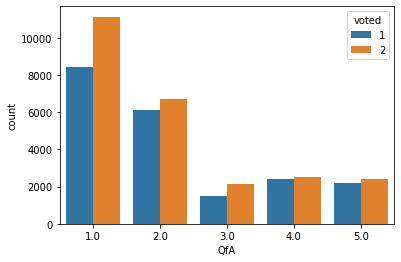

QgA


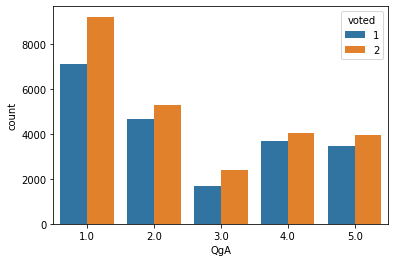

QhA


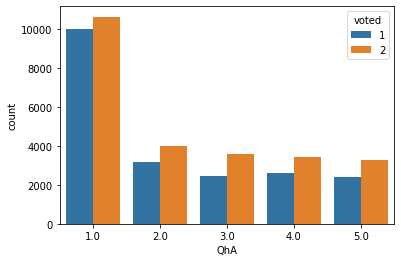

QiA


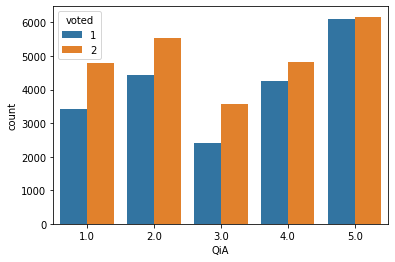

QjA


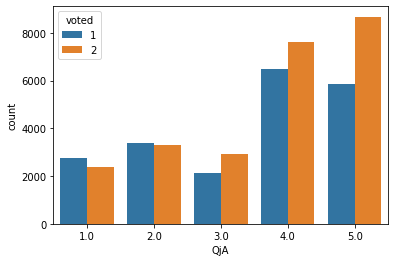

QkA


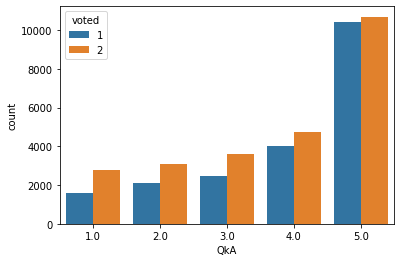

QlA


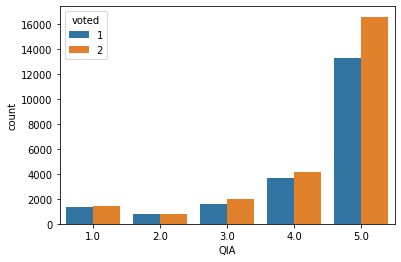

QmA


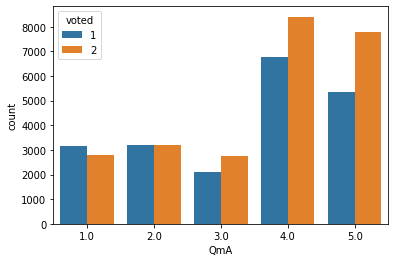

QnA


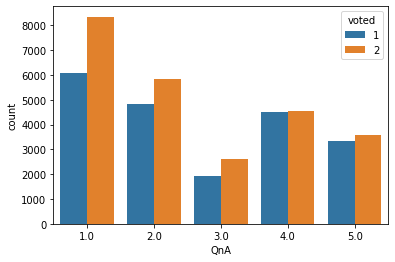

QoA


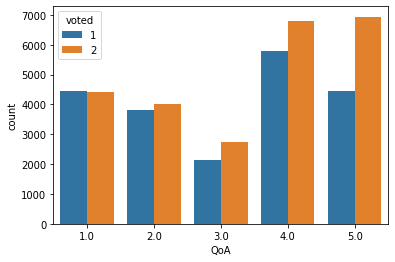

QpA


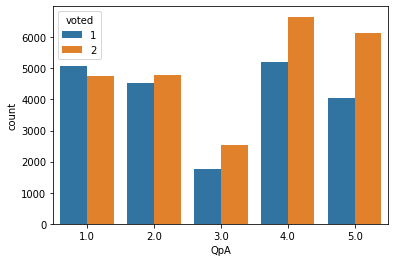

QqA


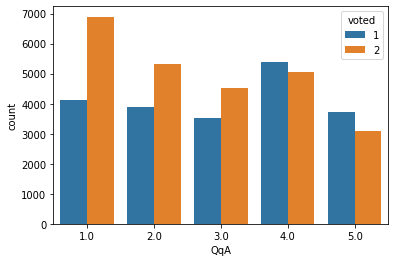

QrA


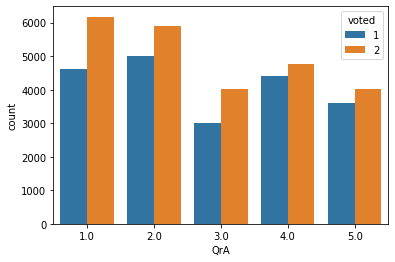

QsA


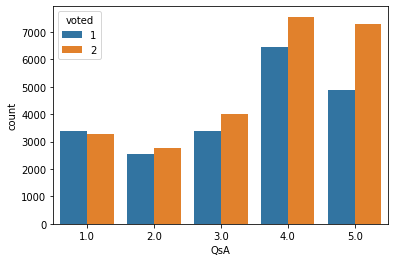

QtA


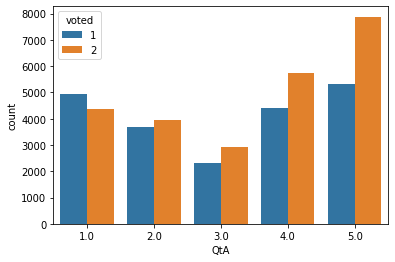

In [13]:

for key in n_an.columns:
  print(key)
  sns.countplot(data = train, x=key,hue=train['voted'])
  plt.show()
  print("=================")
  

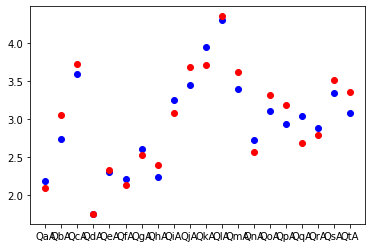

In [14]:
plt.plot(y_an.describe().loc['mean'],'bo')
plt.plot(n_an.describe().loc['mean'],'ro')
plt.show()

QaA
[3. 5. 4. 1. 2.]
3.0 3123 4024
5.0 1143 1145
4.0 2538 2486
1.0 7902 10259
2.0 5928 6984
[0.43696655939555057, 0.4995629370629371, 0.5051751592356688, 0.43510819888772645, 0.4591078066914498]


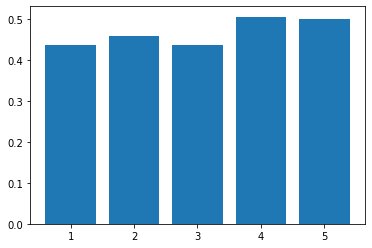

QbA
[4. 5. 1. 3. 2.]
4.0 4475 5637
5.0 3763 6348
1.0 6876 6551
3.0 1778 2274
2.0 3742 4088
[0.44254351265822783, 0.37216892493324105, 0.5121024800774558, 0.43879565646594276, 0.47790549169859514]


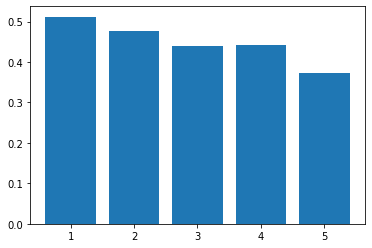

QcA
[5. 3. 1. 4. 2.]
5.0 7642 10329
3.0 1544 2052
1.0 2906 2903
4.0 5636 6359
2.0 2906 3255
[0.42524066551666573, 0.42936596218020023, 0.5002582200034429, 0.4698624426844519, 0.4716766758643077]


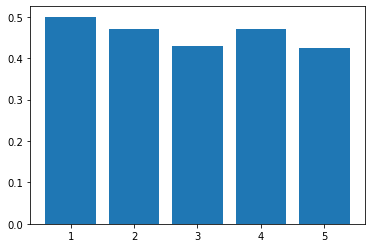

QdA
[1. 5. 4. 3. 2.]
1.0 11371 13867
5.0 627 751
4.0 1127 1442
3.0 2048 2493
2.0 5461 6345
[0.45055075679530865, 0.45500725689404936, 0.43869209809264303, 0.45100198194230345, 0.4625614094528206]


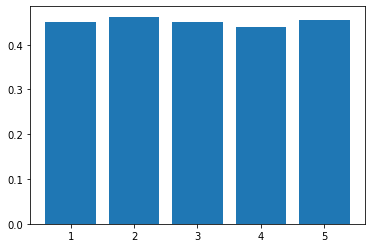

QeA
[2. 1. 5. 4. 3.]
2.0 4830 5629
1.0 8228 9553
5.0 2304 2691
4.0 2316 2660
3.0 2956 4365
[0.46180323166650733, 0.4627411281705191, 0.46126126126126127, 0.4654340836012862, 0.4037699767791285]


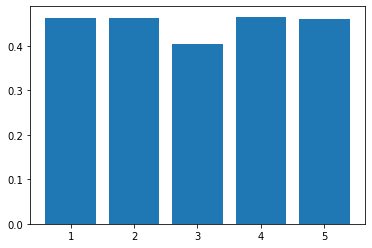

QfA
[5. 3. 1. 2. 4.]
5.0 2185 2389
3.0 1517 2146
1.0 8450 11127
2.0 6095 6699
4.0 2387 2537
[0.4777000437254045, 0.41414141414141414, 0.431628952342034, 0.4763951852430827, 0.4847684809098294]


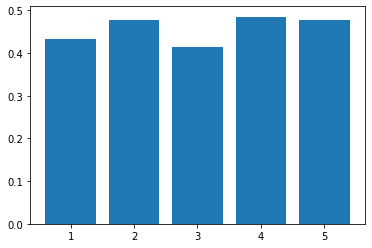

QgA
[2. 1. 4. 5. 3.]
2.0 4673 5274
1.0 7101 9228
4.0 3708 4062
5.0 3457 3957
3.0 1695 2377
[0.4697898863979089, 0.4348704758405291, 0.4772200772200772, 0.46628001079039655, 0.4162573673870334]


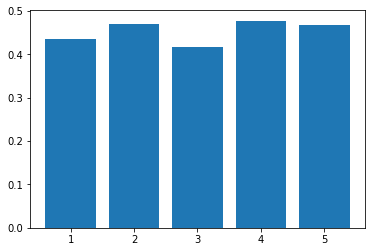

QhA
[4. 1. 3. 5. 2.]
4.0 2614 3408
1.0 10008 10613
3.0 2453 3600
5.0 2393 3274
2.0 3166 4003
[0.43407505812022584, 0.48533048833713205, 0.40525359325954075, 0.42226927827774835, 0.4416236574138653]


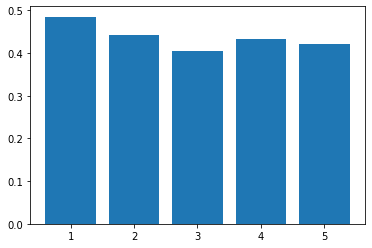

QiA
[5. 3. 1. 2. 4.]
5.0 6106 6170
3.0 2403 3558
1.0 3431 4802
2.0 4437 5547
4.0 4257 4821
[0.4973932877158684, 0.4031202818319074, 0.4167375197376412, 0.4444110576923077, 0.4689358889623265]


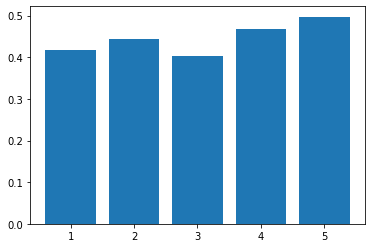

QjA
[4. 3. 2. 5. 1.]
4.0 6493 7598
3.0 2141 2939
2.0 3375 3321
5.0 5860 8675
1.0 2765 2365
[0.4607905755446739, 0.42145669291338583, 0.5040322580645161, 0.40316477468180256, 0.5389863547758285]


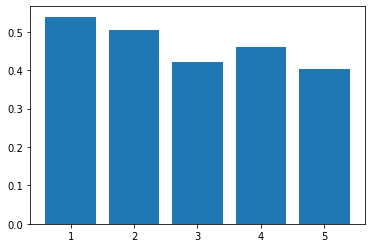

QkA
[4. 5. 3. 1. 2.]
4.0 4037 4763
5.0 10416 10690
3.0 2473 3583
1.0 1583 2799
2.0 2125 3063
[0.45875, 0.49350895479958307, 0.40835535006605017, 0.3612505705157462, 0.40959907478797225]


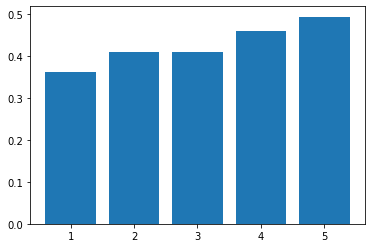

QlA
[4. 5. 1. 3. 2.]
4.0 3668 4127
5.0 13285 16569
1.0 1360 1427
3.0 1556 1974
2.0 765 801
[0.47055805003207185, 0.44499899510953306, 0.48797990670972374, 0.44079320113314446, 0.4885057471264368]


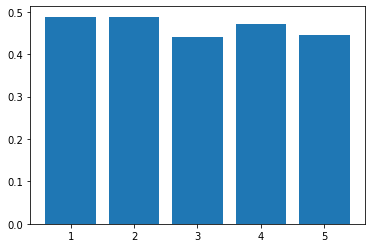

QmA
[2. 1. 4. 3. 5.]
2.0 3209 3191
1.0 3162 2777
4.0 6789 8407
3.0 2118 2736
5.0 5356 7787
[0.50140625, 0.5324128641185385, 0.4467623058699658, 0.4363411619283066, 0.4075173095944609]


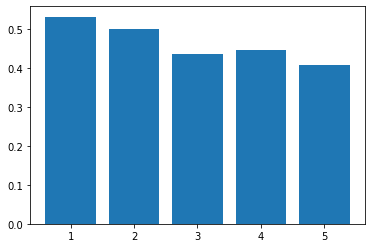

QnA
[5. 4. 2. 3. 1.]
5.0 3317 3560
4.0 4489 4559
2.0 4838 5823
3.0 1908 2610
1.0 6082 8346
[0.48233241238912317, 0.496131741821397, 0.45380358315355035, 0.42231075697211157, 0.42154144718602715]


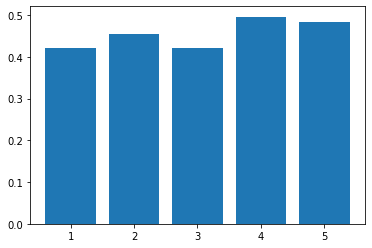

QoA
[2. 1. 4. 5. 3.]
2.0 3797 4003
1.0 4436 4415
4.0 5789 6804
5.0 4464 6936
3.0 2148 2740
[0.4867948717948718, 0.501186306632019, 0.45969983324068925, 0.391578947368421, 0.43944353518821605]


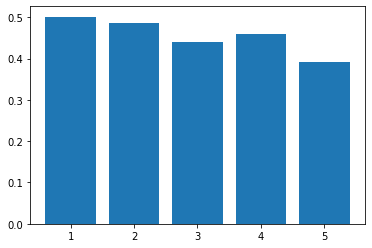

QpA
[2. 5. 1. 4. 3.]
2.0 4525 4795
5.0 4039 6150
1.0 5080 4753
4.0 5213 6662
3.0 1777 2538
[0.4855150214592275, 0.39640789086269507, 0.5166276822943151, 0.43898947368421054, 0.411819235225956]


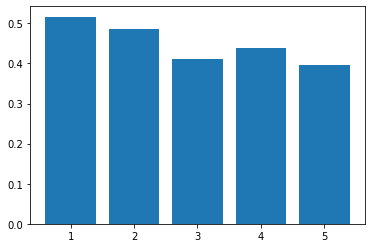

QqA
[2. 5. 3. 4. 1.]
2.0 3891 5331
5.0 3707 3087
3.0 3518 4535
4.0 5382 5050
1.0 4136 6895
[0.4219258295380612, 0.5456284957315278, 0.4368558301254191, 0.5159125766871165, 0.37494334149215847]


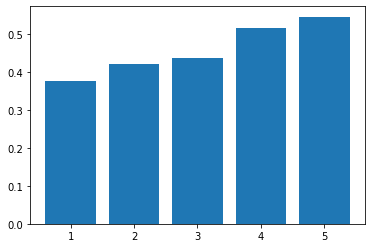

QrA
[2. 1. 4. 5. 3.]
2.0 5002 5903
1.0 4613 6177
4.0 4394 4772
5.0 3608 4033
3.0 3017 4013
[0.45868867491976156, 0.42752548656163114, 0.4793803185686232, 0.4721895039916241, 0.4291607396870555]


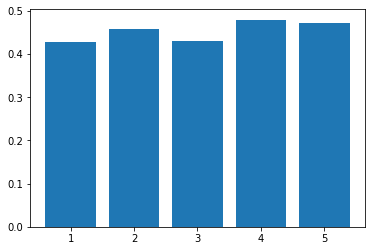

QsA
[2. 4. 1. 3. 5.]
2.0 2541 2759
4.0 6467 7554
1.0 3389 3274
3.0 3373 4016
5.0 4864 7295
[0.47943396226415097, 0.46123671635404034, 0.5086297463604983, 0.45648937609960755, 0.40003289744222387]


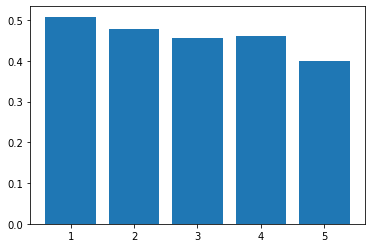

QtA
[1. 5. 2. 3. 4.]
1.0 4938 4363
5.0 5304 7881
2.0 3673 3969
3.0 2313 2941
4.0 4406 5744
[0.5309106547683045, 0.40227531285551765, 0.4806333420570531, 0.4402360106585459, 0.4340886699507389]


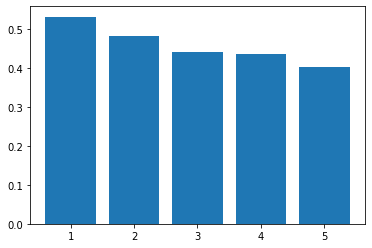

In [15]:
for key in n_an.columns:
  print(key)
  show_vote_rate(train,key)
  print("=================")

QxA는 meanEncording를 적용하고 QxE는 scaler로 조정만 해두자.

QdA는 라벨
QeA는 라벨

QfA는 애매함

QgA는 라벨
QhA는 라벨(조금 애매함)

QkA는 애매함
QIA는 라벨(조금 애매함)
QnA는 라벨(조금 애매함)
QrA는 라벨(조금 애매함)



---
### 나이와 연관성을 알아보자

10s 2314 11901
20s 7484 6628
30s 4614 3222
40s 3243 1808
50s 1936 953
60s 870 324
+70s 173 62
[0.1627857896588111, 0.530328798185941, 0.5888208269525268, 0.6420510789942586, 0.6701280719972309, 0.7286432160804021, 0.7361702127659574]


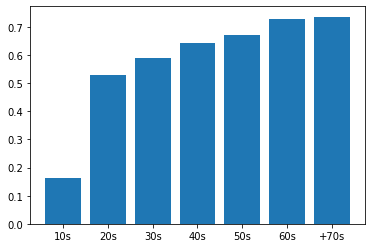

In [16]:
show_vote_rate(train,'age_group',['10s','20s','30s','40s','50s','60s','+70s'])

나이 역시 meanEncording 적용



---

### 교육수준과 연관성

[2 4 3 1 0]
2 6179 10656
4 4867 2987
3 9083 6144
1 253 4835
0 252 276
[0.367032967032967, 0.6196842373312962, 0.596506206081303, 0.0497248427672956, 0.4772727272727273]


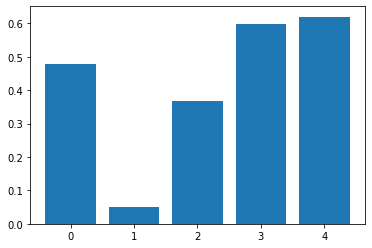

In [17]:
show_vote_rate(train,'education')

meanEncording 적용



---

### 영어 모국어 여부

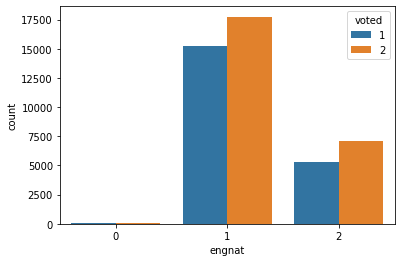

[1 2 0]
1 15277 17747
2 5328 7103
0 29 48
[0.4626029554263566, 0.42860590459335535, 0.37662337662337664]


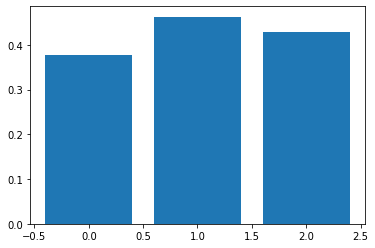

In [18]:
sns.countplot(data = train, x='engnat',hue=train['voted'])
plt.show()
show_vote_rate(train,'engnat')

큰 연관관계를 보이지 않으므로
라벨링 또는 원핫인코딩



---

### 가족수와의 관계

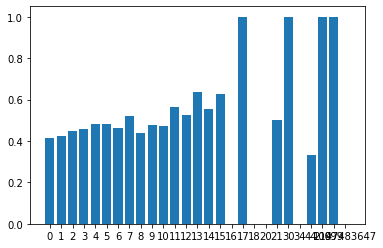

0 503 714
1 2773 3762
2 8065 9853
3 5143 6113
4 2372 2535
5 945 1017
6 389 449
7 201 186
8 97 124
9 60 66
10 28 31
11 22 17
12 11 10
13 7 4
14 5 4
15 5 3
16 0 2
17 3 0
18 0 1
20 0 2
21 1 1
30 1 0
34 0 1
44 1 2
100 1 0
999 1 0
2147483647 0 1
[0.4133114215283484, 0.42433052792654935, 0.45010603862038173, 0.4569118692253021, 0.4833910739759527, 0.481651376146789, 0.46420047732696895, 0.5193798449612403, 0.43891402714932126, 0.47619047619047616, 0.4745762711864407, 0.5641025641025641, 0.5238095238095238, 0.6363636363636364, 0.5555555555555556, 0.625, 0.0, 1.0, 0.0, 0.0, 0.5, 1.0, 0.0, 0.3333333333333333, 1.0, 1.0, 0.0]


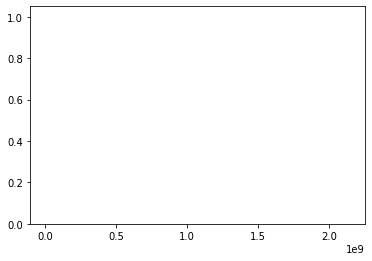

In [19]:
result=[]
index_info=train.loc[:,'familysize'].value_counts().sort_index().index
for i in index_info:
  v_y=train.loc[train.familysize==i].loc[train.voted==1].shape[0]
  v_n=train.loc[train.familysize==i].loc[train.voted==2].shape[0]
  result.append(v_y/(v_y+v_n))
index_str=[str(key) for key in index_info]
plt.bar(index_str,result)
plt.show()
show_vote_rate(train,'familysize',list(index_info))


비정상적인 값을 제외하고 매우 경미한 연관관계가 보임
라벨링 또는 스케일러로 조정하는게 좋아보임
스케일러를 사용할 경우 비정상적인 값은 꼭 제거하고 사용하자

수가 많기때문에 원핫인코딩 사용불가



---

## 성별과 연관성





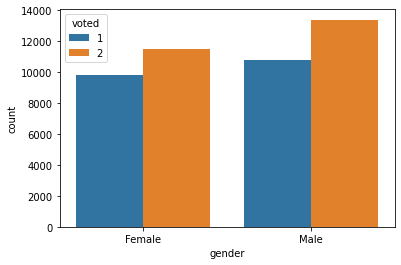

['Female' 'Male']
Female 9814 11501
Male 10820 13397
[0.4604269293924466, 0.44679357476153114]


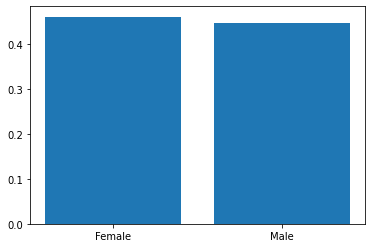

In [20]:
sns.countplot(data = train, x='gender',hue=train['voted'])
plt.show()
show_vote_rate(train,'gender')

특별한 연관성을 알기 힘드므로 라벨링 또는 원핫인코딩



---
## 손과 연관성
 1=Right, 2=Left, 3=Both, 0=무응답

[1 2 3 0]
1 17759 21299
2 2156 2536
3 660 961
0 59 102
[0.45468277945619334, 0.4595055413469736, 0.4071560764959901, 0.36645962732919257]


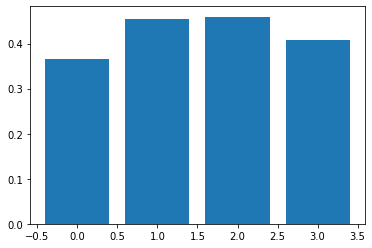

In [21]:
show_vote_rate(train,'hand')

연관성 찾을 수 없음




---

## 결혼과 연관성


혼인 상태 1=Never married, 2=Currently married, 3=Previously married, 0=Other

[3 1 2 0]
3 2212 1618
1 11687 19863
2 6705 3354
0 30 63
[0.5775456919060052, 0.37042789223454836, 0.6665672532060841, 0.3225806451612903]


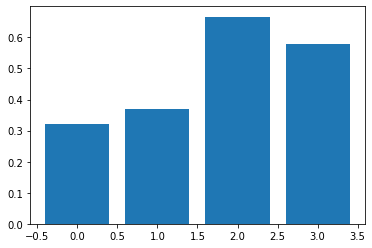

In [22]:
show_vote_rate(train,'married')

어느정도 연관성을 확인 할 수 있었다.



---

## 인종 관련

['White' 'Asian' 'Other' 'Black' 'Native American' 'Arab'
 'Indigenous Australian']
White 15756 15492
Asian 2019 4815
Other 1635 2695
Black 872 1296
Native American 226 322
Arab 102 249
Indigenous Australian 24 29
[0.5042242703533026, 0.29543459174714665, 0.37759815242494227, 0.4022140221402214, 0.4124087591240876, 0.2905982905982906, 0.4528301886792453]


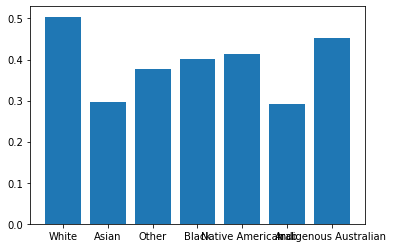

In [23]:
show_vote_rate(train,'race')

어느정도의 연관성을 확인 할 수 있었다.

---

## 종교 관련

['Other' 'Hindu' 'Agnostic' 'Atheist' 'Christian_Other'
 'Christian_Catholic' 'Muslim' 'Buddhist' 'Christian_Protestant' 'Jewish'
 'Christian_Mormon' 'Sikh']
Other 1990 2780
Hindu 553 876
Agnostic 4402 5222
Atheist 4355 5837
Christian_Other 2365 2772
Christian_Catholic 3045 3386
Muslim 373 819
Buddhist 322 528
Christian_Protestant 2756 2119
Jewish 268 219
Christian_Mormon 163 265
Sikh 42 75
[0.4171907756813417, 0.38698390482855144, 0.45739817123857024, 0.4272959183673469, 0.4603854389721627, 0.47348779350023323, 0.31291946308724833, 0.3788235294117647, 0.5653333333333334, 0.5503080082135524, 0.3808411214953271, 0.358974358974359]


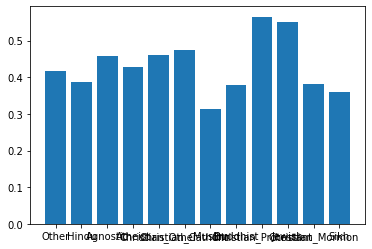

In [24]:
show_vote_rate(train,'religion')



---

##유년기 거주지와 연관성

1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답

[1 3 2 0]
1 4518 4391
3 7455 10312
2 8497 10037
0 164 158
[0.5071276237512627, 0.4195981313671413, 0.4584547318441783, 0.5093167701863354]


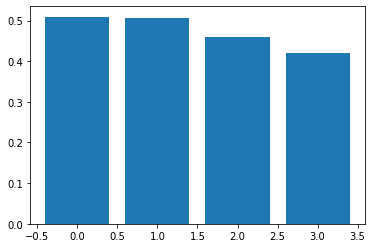

In [25]:
show_vote_rate(train,'urban')

미약한 연관성을 보인다



---

## tpX 데이터들

tp01
[2 1 5 3 0 4 6 7]
2 3491 4386
1 4260 4754
5 3620 4322
3 1590 2102
0 2326 2457
4 2675 3225
6 2544 3497
7 128 155
[0.4431890313571156, 0.4725981806079432, 0.45580458322840595, 0.43066088840736727, 0.48630566590006274, 0.4533898305084746, 0.4211223307399437, 0.45229681978798586]


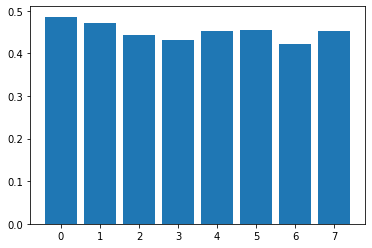

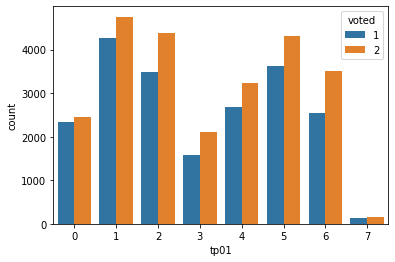

tp02
[2 1 3 4 5 6 0 7]
2 5570 6928
1 4002 5206
3 1577 2344
4 1969 2229
5 2660 2680
6 2421 2193
0 2303 3135
7 132 183
[0.4456713074091855, 0.434622067767159, 0.4021933180311145, 0.4690328727965698, 0.49812734082397003, 0.5247074122236671, 0.4235012872379551, 0.41904761904761906]


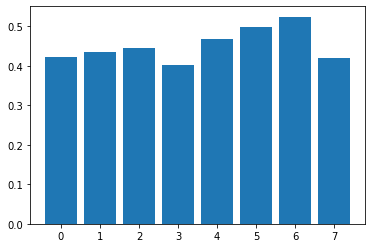

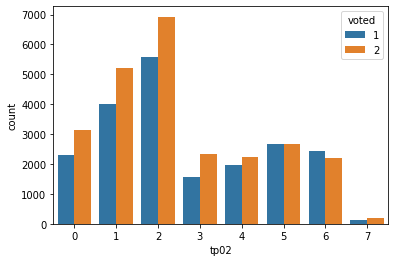

tp03
[2 0 1 5 3 4 6 7]
2 3713 5064
0 5863 5704
1 6405 7083
5 998 1517
3 1418 2065
4 1642 2411
6 454 834
7 141 220
[0.4230374843340549, 0.5068730007780755, 0.4748665480427046, 0.39681908548707756, 0.4071202985931668, 0.40513200098692326, 0.35248447204968947, 0.39058171745152354]


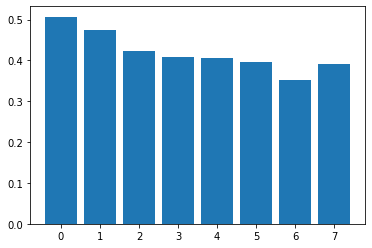

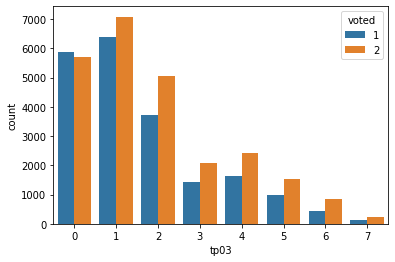

tp04
[1 0 5 6 4 2 3 7]
1 2875 3877
0 2026 3411
5 3517 3760
6 3521 3557
4 2253 2501
2 4662 5527
3 1652 2058
7 128 207
[0.42579976303317535, 0.37263196615780764, 0.4833035591589941, 0.49745690873128, 0.4739167017248633, 0.457552262243596, 0.44528301886792454, 0.382089552238806]


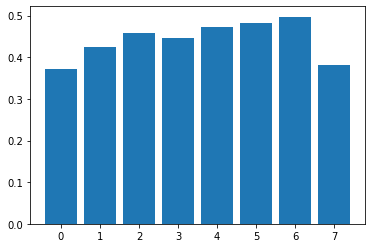

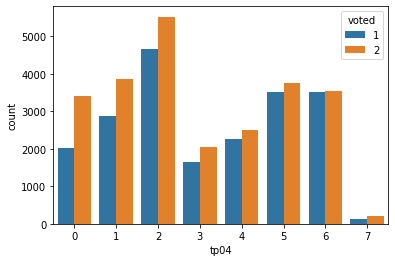

tp05
[2 1 3 0 5 4 6 7]
2 3782 4993
1 6422 7259
3 1081 1669
0 7390 8382
5 538 705
4 1103 1410
6 192 315
7 126 165
[0.430997150997151, 0.469410130838389, 0.3930909090909091, 0.4685518640628963, 0.4328238133547868, 0.4389176283326701, 0.378698224852071, 0.4329896907216495]


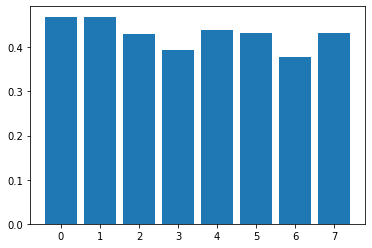

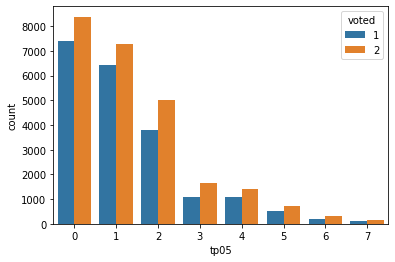

tp06
[1 2 4 3 0 5 6 7]
1 3745 4895
2 4277 5168
4 2242 2472
3 1848 2278
0 3676 5236
5 2265 2399
6 2460 2276
7 121 174
[0.43344907407407407, 0.45283218634197986, 0.4756045820958846, 0.4478914202617547, 0.4124775583482944, 0.4856346483704974, 0.5194256756756757, 0.4101694915254237]


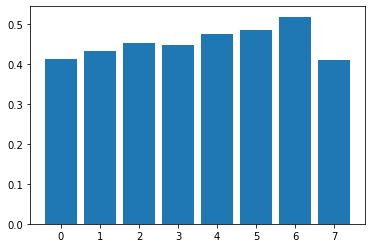

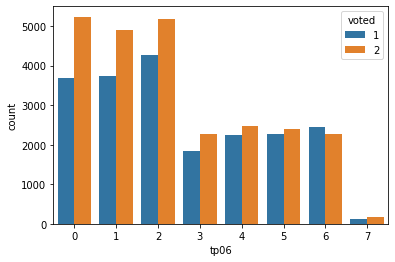

tp07
[7 3 2 1 0 5 4 6]
7 140 197
3 1844 2495
2 4443 5471
1 5582 6107
0 4983 4828
5 1221 1908
4 1646 2322
6 775 1570
[0.41543026706231456, 0.4249827149112699, 0.4481541254791204, 0.47754298913508425, 0.507899296707777, 0.39022051773729627, 0.41481854838709675, 0.3304904051172708]


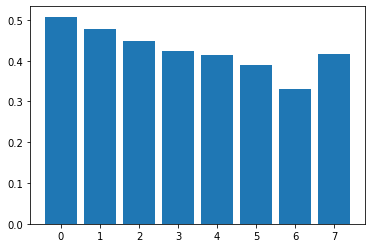

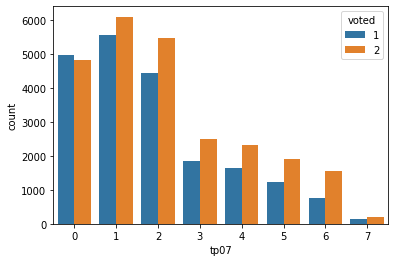

tp08
[4 6 3 7 2 1 5 0]
4 2574 3156
6 5083 4568
3 1684 2281
7 165 237
2 4205 5595
1 1898 2963
5 3900 4039
0 1125 2059
[0.4492146596858639, 0.5266811729354471, 0.42471626733921813, 0.41044776119402987, 0.4290816326530612, 0.3904546389631763, 0.4912457488348658, 0.3533291457286432]


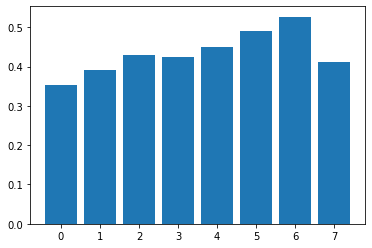

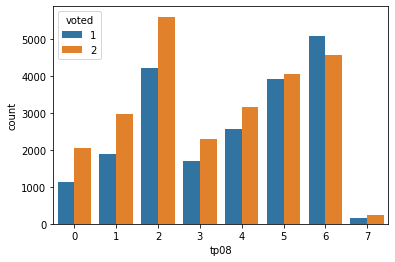

tp09
[4 0 1 2 5 3 6 7]
4 2752 3576
0 4276 4523
1 5310 5449
2 3611 4258
5 1546 2380
3 2183 2861
6 830 1691
7 126 160
[0.43489254108723135, 0.4859643141266053, 0.4935402918486848, 0.45888931249205744, 0.3937850229240958, 0.432791435368755, 0.32923443078143594, 0.4405594405594406]


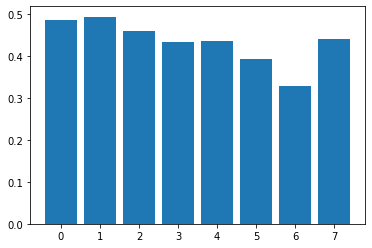

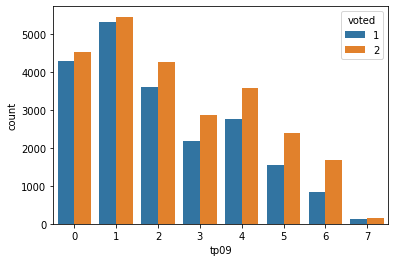

tp10
[3 4 6 5 1 2 0 7]
3 1863 2606
4 3166 3853
6 6780 7819
5 4936 5766
1 1066 1338
2 2071 2456
0 605 841
7 147 219
[0.41687178339673303, 0.4510614047585126, 0.46441537091581614, 0.46122220145767145, 0.44342762063227953, 0.45747735807377954, 0.41839557399723376, 0.4016393442622951]


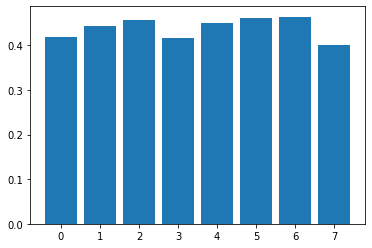

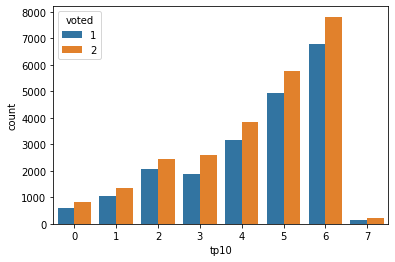

In [26]:
for column in train.columns:
  if column.startswith('tp'):
    print(column)
    show_vote_rate(train,column)
    sns.countplot(data = train, x=column,hue=train['voted'])
    plt.show()

meanEncording을 할지 좀 애매함



---
## wXX 데이터
wr_(01~13) : 실존하는 해당 단어의 정의을 앎 1=Yes, 0=No

wf_(01~03) : 허구인 단어의 정의를 앎 1=Yes, 0=No


wr_01
[0 1]
0 4880 8337
1 15754 16561
[0.36922145721419386, 0.4875135386043633]


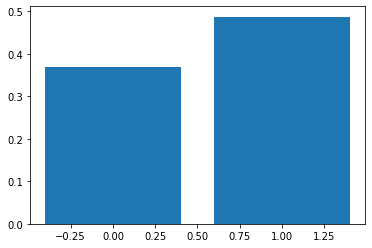

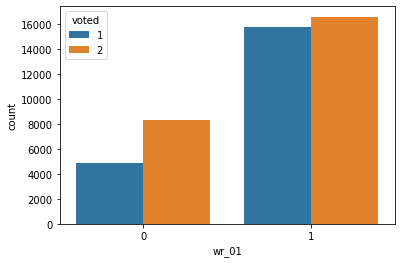

wr_02
[1 0]
1 19487 23076
0 1147 1822
[0.45783896811784885, 0.38632536207477264]


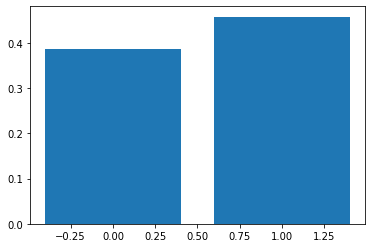

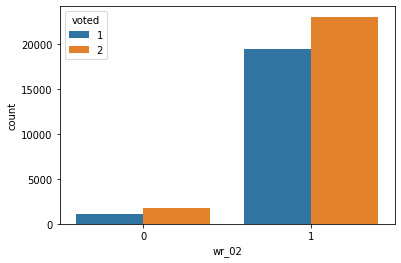

wr_03
[0 1]
0 15421 20596
1 5213 4302
[0.42815892495210595, 0.5478717813977929]


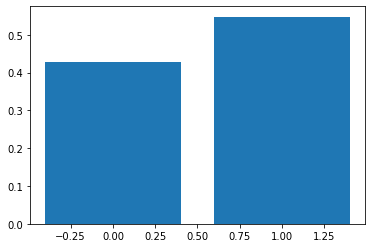

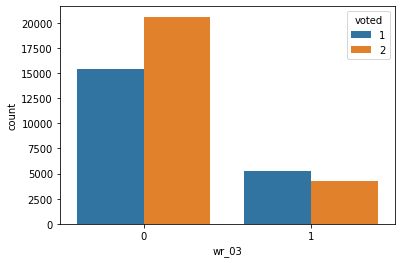

wr_04
[0 1]
0 2172 3806
1 18462 21092
[0.3633322181331549, 0.46675431056277494]


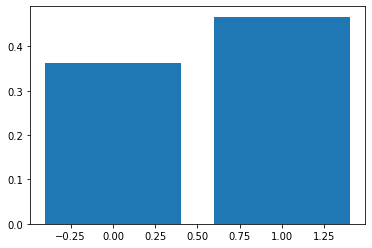

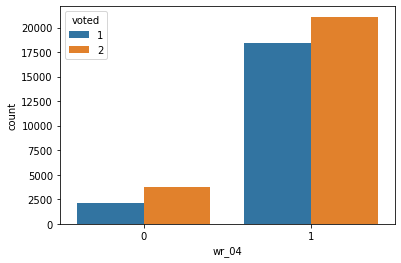

wr_05
[1 0]
1 19134 21650
0 1500 3248
[0.4691545704197725, 0.3159224936815501]


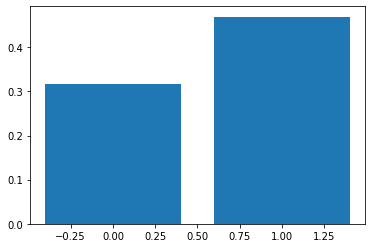

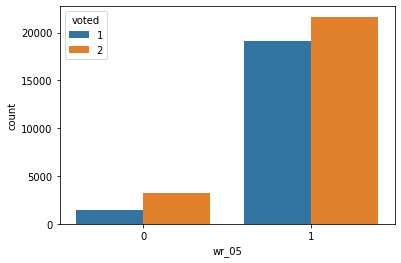

wr_06
[0 1]
0 12764 17809
1 7870 7089
[0.4174925587937069, 0.5261046861421218]


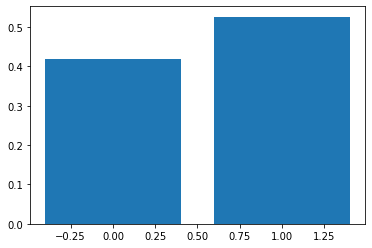

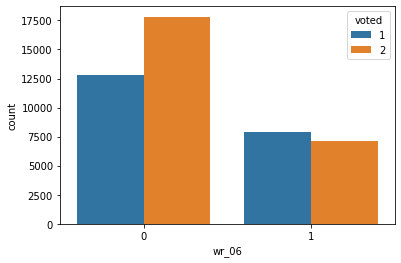

wr_07
[1 0]
1 19558 23192
0 1076 1706
[0.4574970760233918, 0.38677210639827464]


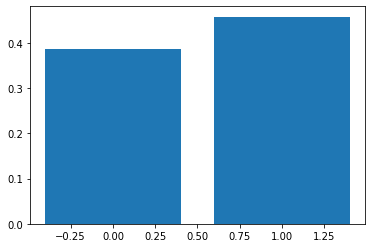

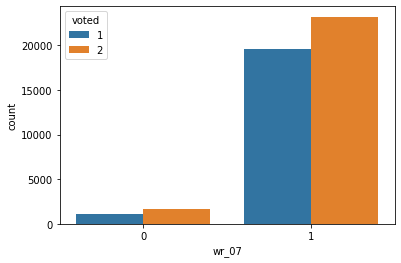

wr_08
[1 0]
1 20140 24126
0 494 772
[0.4549767315772828, 0.3902053712480253]


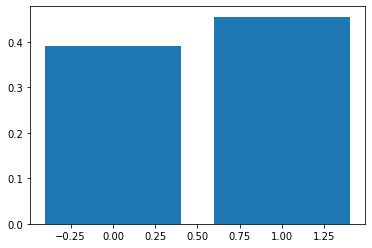

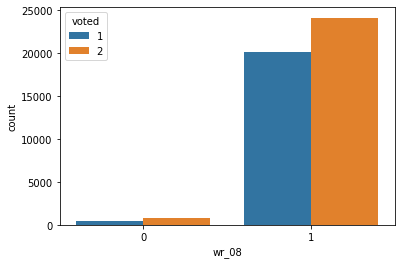

wr_09
[0 1]
0 15646 20651
1 4988 4247
[0.4310549081191283, 0.540119112073633]


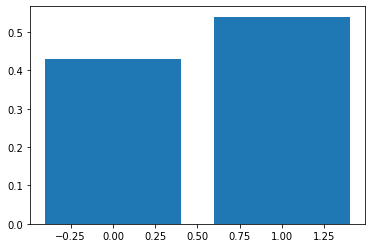

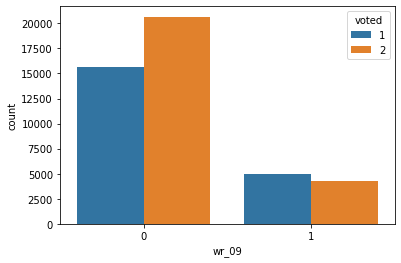

wr_10
[1 0]
1 19725 23353
0 909 1545
[0.45789033845582433, 0.3704156479217604]


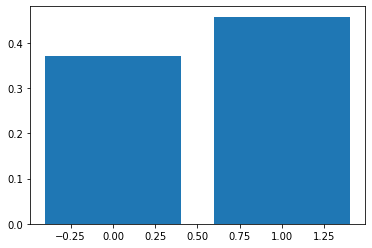

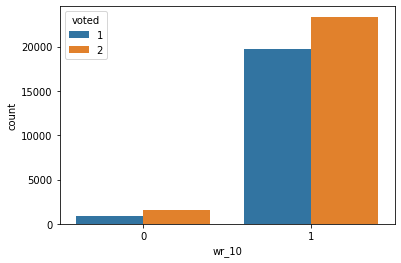

wr_11
[0 1]
0 11186 16352
1 9448 8546
[0.4062023385866802, 0.5250639101922863]


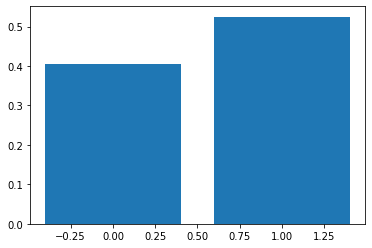

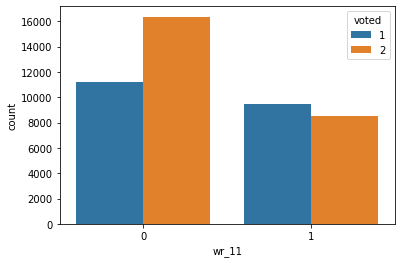

wr_12
[1 0]
1 19790 23362
0 844 1536
[0.45861142009640343, 0.3546218487394958]


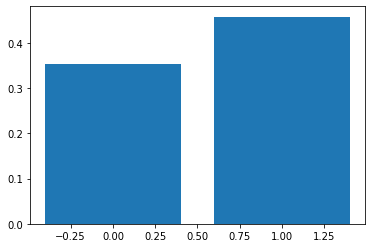

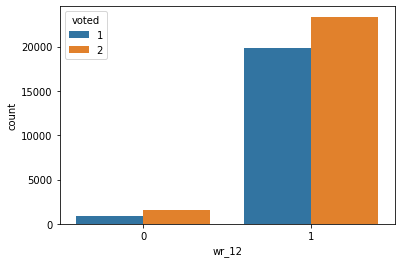

wr_13
[1 0]
1 19473 22737
0 1161 2161
[0.4613361762615494, 0.3494882600842866]


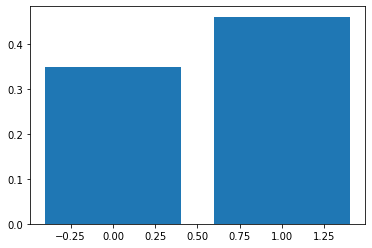

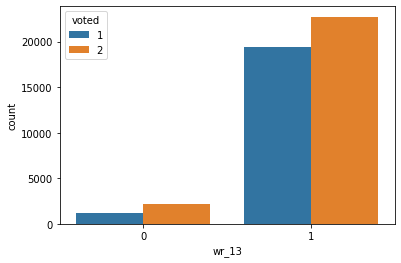

wf_01
[0 1]
0 18995 22913
1 1639 1985
[0.45325474849670705, 0.4522626931567329]


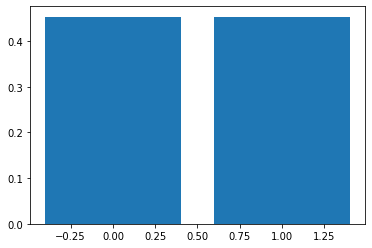

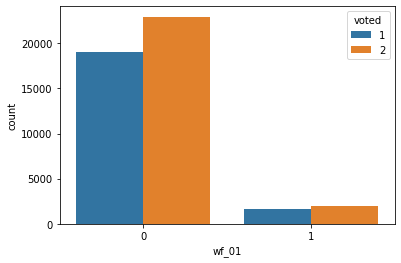

wf_02
[0 1]
0 17098 20982
1 3536 3916
[0.44900210084033615, 0.4745034889962426]


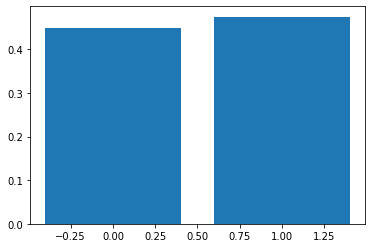

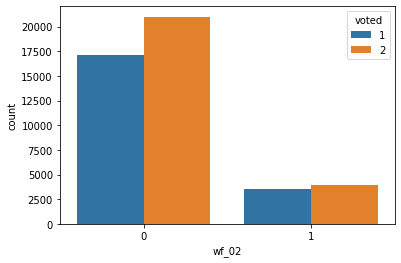

wf_03
[0 1]
0 17914 22229
1 2720 2669
[0.44625463966320406, 0.5047318611987381]


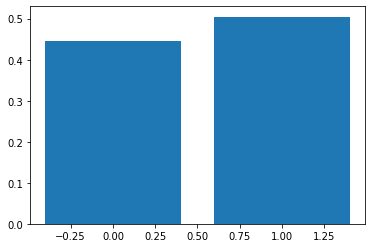

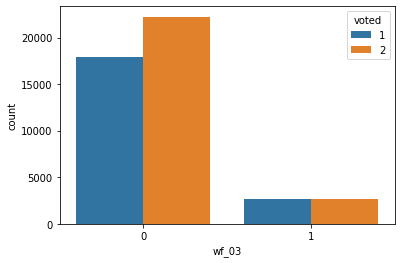

In [27]:
for column in train.columns:
  if column.startswith('wr'):
    print(column)
    show_vote_rate(train,column)
    sns.countplot(data = train, x=column,hue=train['voted'])
    plt.show()
print("=================================")
for column in train.columns:
  if column.startswith('wf'):
    print(column)
    show_vote_rate(train,column)
    sns.countplot(data = train, x=column,hue=train['voted'])
    plt.show()

wr은 투표율에 영향을 끼치지만 wf는 wf_03을 제외하고 영향이 거의 미미하다.

[]

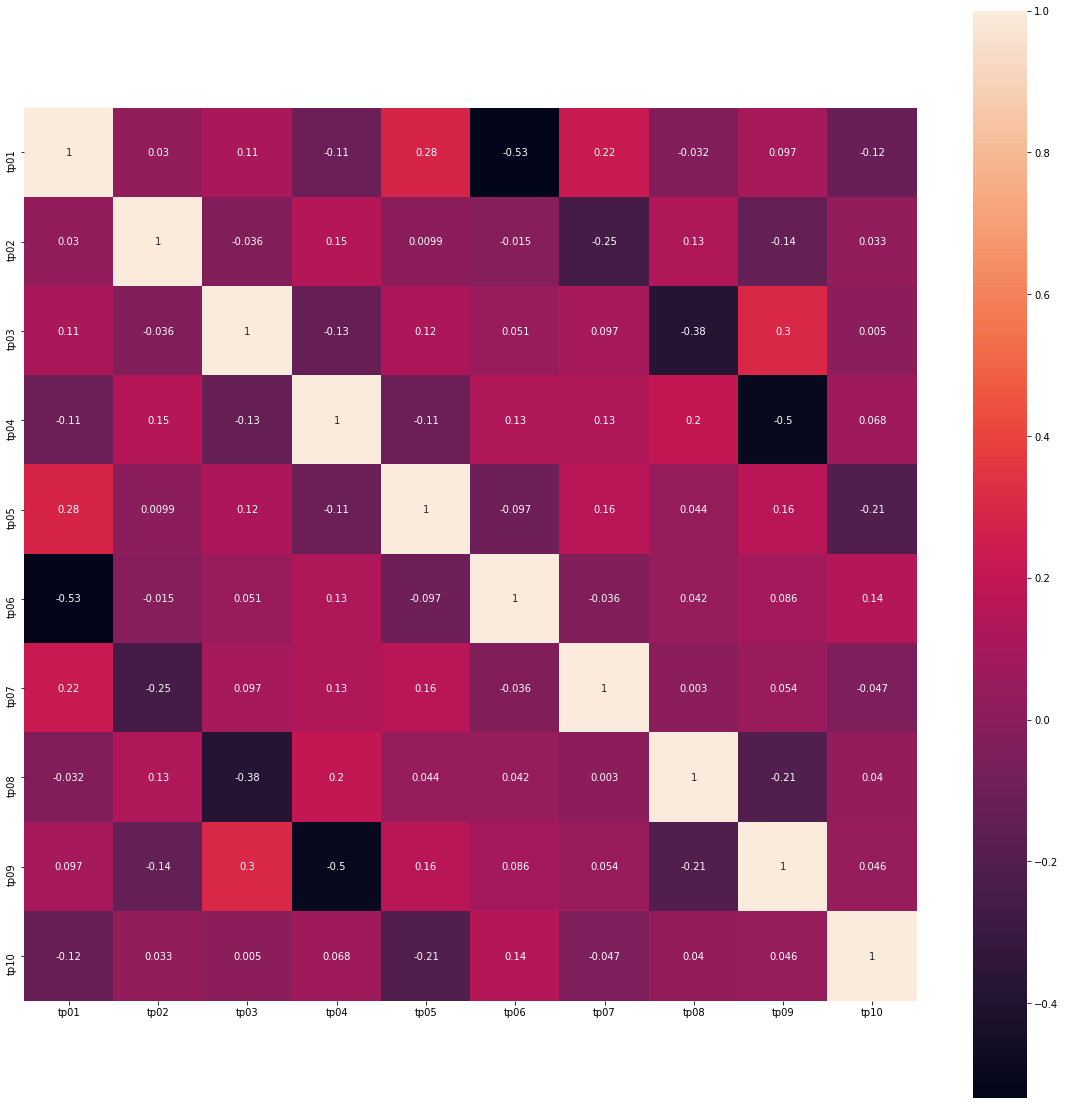

In [28]:
cat_columns = train.columns[7 <= train.nunique()] & train.columns[train.nunique() <= 15]
#cat_columns = train.columns[100 <= train.nunique()]
plt.figure(figsize = (20,20))
sns.heatmap(train.loc[:,cat_columns].corr(),square = True, annot = True)
plt.plot()



---

#Encoding




사용할 특징

QaE QcE QgE QnE QrE QsE QtE

QbA QeA QhA QiA QjA QkA QmA QoA QpA QqA QsA QtA

age_group education married race religion urban

tp03 tp04 tp06 tp07 tp08 tp09

tp01

wr_01~wr_13

wf_03

In [29]:
cat_columns = list(train.columns[100 <= train.nunique()])
cat_columns.remove('index')
print(cat_columns)

['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE', 'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqE', 'QrE', 'QsE', 'QtE']




---

### Scaler

In [30]:
def RobustScalerEncording(trainDf,testDf,target):
  scaler=RobustScaler()
  trainDf["sc_"+target]=scaler.fit_transform(trainDf[target].to_numpy().reshape(-1,1))
  testDf["sc_"+target]=scaler.transform(testDf[target].to_numpy().reshape(-1,1))
  trainDf=trainDf.drop(target,axis=1)
  testDf=testDf.drop(target,axis=1)
  return trainDf,testDf,scaler





---

### OneHotEncoding


In [31]:
def OneHotEncoding(trainDf,testDf,target):
  onehot_columns=[]
  encoder = OneHotEncoder()
  train_encoded=encoder.fit_transform(trainDf.loc[:,[target]]).toarray()
  test_encoded=encoder.transform(testDf.loc[:,[target]]).toarray()
  
  encoded_columns=[x.replace('x0',"onehot_"+target) for x in encoder.get_feature_names()]
  onehot_columns.append(encoded_columns)

  #print(train_encoded)

  encoded_train=pd.DataFrame(train_encoded,columns=encoded_columns)
  encoded_test=pd.DataFrame(test_encoded,columns=encoded_columns)  

  trainDf=pd.concat([trainDf,encoded_train],axis=1)
  testDf=pd.concat([testDf,encoded_test],axis=1)  

  trainDf=trainDf.drop(target,axis=1)
  testDf=testDf.drop(target,axis=1)

  return trainDf,testDf,encoder



---

### MeanEncoding

In [32]:
def MeanEncoding(trainDf,testDf,target):
  target_dict=trainDf.groupby(target)['voted'].agg('mean').to_dict()
  new_key='encoded_'+target
  trainDf[new_key]=trainDf.loc[:,target].map(target_dict)
  testDf[new_key]=testDf.loc[:,target].map(target_dict)
  trainDf=trainDf.drop(target,axis=1)
  testDf=testDf.drop(target,axis=1)
  return trainDf,testDf,target_dict
def MeanEncoding2(trainDf,testDf,target,element=None):
    target_dict=dict()
    target=str(target)
    if element==None:
      element= trainDf[target].unique()
    for e in element:
      y=trainDf.query(target+' == "'+str(e)+'" and voted == "1"').shape[0]
      n=trainDf.query(target+' == "'+str(e)+'" and voted == "2"').shape[0]
      target_dict[e]=y/(y+n)
    new_key='encoded_'+target
    trainDf[new_key]=trainDf.loc[:,target].map(target_dict)
    testDf[new_key]=testDf.loc[:,target].map(target_dict)
    trainDf=trainDf.drop(target,axis=1)
    testDf=testDf.drop(target,axis=1)
    return trainDf,testDf,target_dict




---

### LabelEncoding

In [33]:
def LabelEncoding(trainDf,testDf,target):
  encoder=LabelEncoder()
  new_f='label_'+target
  trainDf[new_f]=encoder.fit_transform(trainDf[target])
  testDf[new_f]=encoder.transform(testDf[target])

  trainDf.drop(target,axis=1)
  testDf.drop(target,axis=1)
  return trainDf,testDf,encoder




---


## Encoding적용

In [34]:

for col in ['QaE','QcE','QgE','QnE','QrE','QsE','QtE']:
  train,test,_=RobustScalerEncording(train,test,col)
for col in ['engnat','gender','hand']:
  train,test,_=OneHotEncoding(train,test,col)
for col in []:
  train,test,_=LabelEncoding(train,test,col)
for col in ['tp03','tp04','tp06','tp07','tp08','tp09','wf_03','married','race','religion','age_group','education']:
  train,test,_=MeanEncoding(train,test,col)
for col in [column for column in train.columns if column.startswith('wr')]:
  train,test,_=MeanEncoding(train,test,col)
display(train)
display(test)

,index,QaA,QbA,QbE,QcA,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QsA,QtA,familysize,tp01,tp02,tp05,tp10,urban,voted,wf_01,wf_02,sc_QaE,sc_QcE,sc_QgE,sc_QnE,sc_QrE,sc_QsE,sc_QtE,onehot_engnat_0,onehot_engnat_1,onehot_engnat_2,onehot_gender_Female,onehot_gender_Male,onehot_hand_0,onehot_hand_1,onehot_hand_2,onehot_hand_3,encoded_tp03,encoded_tp04,encoded_tp06,encoded_tp07,encoded_tp08,encoded_tp09,encoded_wf_03,encoded_married,encoded_race,encoded_religion,encoded_age_group,encoded_education,encoded_wr_01,encoded_wr_02,encoded_wr_03,encoded_wr_04,encoded_wr_05,encoded_wr_06,encoded_wr_07,encoded_wr_08,encoded_wr_09,encoded_wr_10,encoded_wr_11,encoded_wr_12,encoded_wr_13
0,0,3.0,4.0,1370,5.0,1.0,1024,2.0,1577,5.0,539,2.0,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,2.0,579,2.0,924,2.0,366,2.0,2.0,1.0,4,2,2,2,3,1,2,0,0,-0.458629,0.143275,-0.309484,0.475162,-0.277011,-0.190955,0.119798,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.576963,1.574200,1.566551,1.584570,1.550785,1.565107,1.553745,1.422454,1.495776,1.582809,1.411179,1.632967,1.630779,1.542161,1.571841,1.636668,1.530845,1.582507,1.542503,1.545023,1.568945,1.54211,1.593798,1.541389,1.538664
1,1,5.0,5.0,1313,3.0,5.0,2969,1.0,4320,3.0,2190,1.0,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1.0,1214,5.0,2414,5.0,1356,1.0,4.0,1.0,3,1,1,1,4,3,2,0,0,0.212766,3.637427,0.089850,2.660907,2.209195,5.958124,0.411097,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.493127,1.627368,1.547168,1.575017,1.550785,1.514036,1.553745,1.629572,1.704565,1.613016,1.469671,1.380316,1.630779,1.542161,1.571841,1.533246,1.530845,1.582507,1.542503,1.545023,1.568945,1.54211,1.593798,1.541389,1.538664
2,2,4.0,1.0,1480,1.0,4.0,3374,5.0,1333,1.0,531,4.0,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2.0,1304,1.0,1131,5.0,937,4.0,1.0,1.0,3,2,3,3,3,2,1,0,0,2.520095,0.178363,0.657238,3.362851,0.241379,0.708543,0.490542,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.525133,1.516696,1.524395,1.551846,1.473319,1.506460,1.495268,1.333433,1.495776,1.582809,1.411179,1.403494,1.512486,1.542161,1.571841,1.533246,1.530845,1.582507,1.542503,1.545023,1.459881,1.54211,1.593798,1.541389,1.538664
3,3,3.0,3.0,2311,4.0,3.0,3245,1.0,357,2.0,1519,4.0,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,4.0,1169,4.0,23868,3.0,581,4.0,4.0,5.0,0,2,4,1,3,3,1,0,0,-0.125296,0.135965,-1.019967,1.339093,8.865517,2.755444,0.368222,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.525133,1.574200,1.552109,1.522457,1.575284,1.506460,1.553745,1.629572,1.704565,1.613016,1.469671,1.380316,1.630779,1.542161,1.571841,1.636668,1.684078,1.582507,1.613228,1.545023,1.568945,1.54211,1.593798,1.541389,1.538664
4,4,1.0,1.0,707,5.0,2.0,1062,1.0,1014,2.0,628,1.0,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,1.0,754,4.0,1140,5.0,323,5.0,1.0,2.0,2,1,1,0,6,1,1,0,1,0.874704,-0.501462,0.364393,-0.045356,-0.054023,-0.274707,1.095839,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.525133,1.502543,1.547168,1.492101,1.473319,1.541111,1.553745,1.333433,1.495776,1.542602,1.469671,1.403494,1.512486,1.542161,1.571841,1.533246,1.530845,1.473895,1.542503,1.545023,1.568945,1.54211,1.474936,1.541389,1.538664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,5.0,619,4.0,1.0,285,1.0,602,1.0,267,1.0,1.0,483,1.0,1016,4.0,278,4.0,611,5.0,215,4.0,388,1.0,2.0,1915,4.0,439,2.0,823,1.0,5.0,4.0,1,1,2,2,4,3,2,0,0,1.165485,-0.834795,-0.760399,-0.641469,-0.928736,-0.269682,1.553594,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.647516,1.574200,1.480574,1.575017,1.646671,1.670766,1.495268,1.629572,1.495776,1.449692,1.837214,1.632967,1.512486,1.542161,1.571841,1.533246,1.530845,1.582507,1.542503,1.545023,1.459881,1.54211,1.593798,1

,index,QaA,QbA,QbE,QcA,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QsA,QtA,familysize,tp01,tp02,tp05,tp10,urban,wf_01,wf_02,sc_QaE,sc_QcE,sc_QgE,sc_QnE,sc_QrE,sc_QsE,sc_QtE,onehot_engnat_0,onehot_engnat_1,onehot_engnat_2,onehot_gender_Female,onehot_gender_Male,onehot_hand_0,onehot_hand_1,onehot_hand_2,onehot_hand_3,encoded_tp03,encoded_tp04,encoded_tp06,encoded_tp07,encoded_tp08,encoded_tp09,encoded_wf_03,encoded_married,encoded_race,encoded_religion,encoded_age_group,encoded_education,encoded_wr_01,encoded_wr_02,encoded_wr_03,encoded_wr_04,encoded_wr_05,encoded_wr_06,encoded_wr_07,encoded_wr_08,encoded_wr_09,encoded_wr_10,encoded_wr_11,encoded_wr_12,encoded_wr_13
0,0,3.0,2.0,2941,3.0,1.0,4857,2.0,2550,4.0,3171,5.0,2.0,1494,4.0,1597,2.0,8891,5.0,2416,3.0,2043,3.0,3445,5.0,3.0,1152,4.0,1447,3.0,798,4.0,1.0,2.0,3,2,1,1,4,2,0,0,0.423168,5.441520,4.727121,1.373650,-0.072414,4.547739,0.757881,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.525133,1.526083,1.547168,1.551846,1.575284,1.565107,1.553745,1.629572,1.495776,1.434667,1.837214,1.632967,1.630779,1.542161,1.571841,1.636668,1.530845,1.582507,1.613228,1.545023,1.568945,1.542110,1.593798,1.541389,1.538664
1,1,3.0,2.0,1952,3.0,3.0,821,4.0,1150,1.0,605,2.0,1.0,2370,5.0,2268,3.0,1759,5.0,771,5.0,1124,3.0,4525,1.0,2.0,988,3.0,1014,4.0,380,5.0,3.0,4.0,2,7,7,7,7,3,0,0,-0.101655,0.954678,-0.284526,-0.079914,-0.140230,-0.197655,-0.393443,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.609418,1.617910,1.589831,1.584570,1.589552,1.559441,1.553745,1.629572,1.622402,1.526512,1.837214,1.632967,1.630779,1.613675,1.571841,1.636668,1.684078,1.582507,1.613228,1.609795,1.568945,1.629584,1.593798,1.645378,1.650512
2,2,3.0,2.0,2507,4.0,2.0,614,2.0,1326,2.0,767,1.0,1.0,1309,2.0,3317,4.0,766,4.0,1940,5.0,926,4.0,568,2.0,5.0,669,3.0,2417,3.0,710,4.0,3.0,5.0,7,6,2,6,1,1,0,0,-0.134752,-0.612573,0.044925,0.025918,1.912644,0.608040,0.066835,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.592880,1.627368,1.566551,1.551846,1.570918,1.565107,1.553745,1.333433,1.622402,1.539615,1.411179,1.403494,1.630779,1.542161,1.571841,1.636668,1.530845,1.582507,1.542503,1.545023,1.568945,1.542110,1.593798,1.541389,1.538664
3,3,1.0,1.0,1050,5.0,2.0,2252,5.0,2533,1.0,578,1.0,1.0,2886,1.0,1379,1.0,1392,3.0,2855,5.0,697,4.0,573,1.0,2.0,1076,4.0,1445,5.0,1069,1.0,4.0,1.0,4,0,5,0,6,2,0,0,0.264775,0.783626,-0.049917,-0.397408,-0.310345,0.634841,0.277427,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.525133,1.502543,1.480574,1.492101,1.508754,1.506460,1.553745,1.333433,1.495776,1.526512,1.271357,1.380316,1.512486,1.542161,1.452128,1.533246,1.530845,1.473895,1.542503,1.545023,1.459881,1.542110,1.474936,1.541389,1.538664
4,4,2.0,1.0,1243,5.0,2.0,1666,2.0,925,2.0,413,5.0,1.0,995,2.0,1427,3.0,1093,5.0,1201,4.0,1264,2.0,943,4.0,2.0,787,4.0,607,3.0,529,4.0,4.0,3.0,3,6,1,3,3,2,0,0,-0.137116,-0.078947,-0.683860,-0.261339,-0.195402,-0.373534,1.166456,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.576963,1.542448,1.587522,1.609779,1.570918,1.565107,1.553745,1.629572,1.495776,1.542602,1.837214,1.632967,1.512486,1.542161,1.571841,1.533246,1.530845,1.582507,1.542503,1.545023,1.568945,1.542110,1.474936,1.541389,1.538664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,5.0,5.0,1066,5.0,1.0,560,2.0,1110,2.0,438,4.0,1.0,1616,3.0,1448,4.0,1886,4.0,852,5.0,872,2.0,526,3.0,4.0,818,2.0,736,4.0,828,2.0,2.0,4.0,3,1,0,0,5,0,0,0,-0.307329,-0.454678,-0.655574,-0.464363,-0.073563,-0.351759,-0.535939,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.493127,1.554717,1.524395,1.522457,1.646671,1.565107,1.553745,1.629572,1.622402,1.526512,1.469671,1.403494,1.512486,1.542161,1.571841,1.533246,1.530845,1.582507,1.542503,1.545023,1.568945,1.542110,1.593798,1.541389,

In [35]:
scaler_lst=[column for column in train.columns if column.startswith('sc_')]
oneHot_lst=[column for column in train.columns if column.startswith('onehot_')]
mean_lst=[column for column in train.columns if column.startswith('encoded_')]
label_lst=[column for column in train.columns if column.startswith('label_')]
etc_lst=['QbA','QeA','QhA','QiA','QjA','QkA','QmA','QoA','QpA','QqA','QsA','QtA']
col_lst=list(train.columns)

for key in scaler_lst+oneHot_lst+mean_lst+label_lst+etc_lst:
  try:
    col_lst.remove(key)
  except:
    pass


train=train.drop(col_lst,axis=1)
col_lst.remove("voted")
test=test.drop(col_lst,axis=1)

display(train)
display(test)





,QbA,QeA,QhA,QiA,QjA,QkA,QmA,QoA,QpA,QqA,QsA,QtA,sc_QaE,sc_QcE,sc_QgE,sc_QnE,sc_QrE,sc_QsE,sc_QtE,onehot_engnat_0,onehot_engnat_1,onehot_engnat_2,onehot_gender_Female,onehot_gender_Male,onehot_hand_0,onehot_hand_1,onehot_hand_2,onehot_hand_3,encoded_tp03,encoded_tp04,encoded_tp06,encoded_tp07,encoded_tp08,encoded_tp09,encoded_wf_03,encoded_married,encoded_race,encoded_religion,encoded_age_group,encoded_education,encoded_wr_01,encoded_wr_02,encoded_wr_03,encoded_wr_04,encoded_wr_05,encoded_wr_06,encoded_wr_07,encoded_wr_08,encoded_wr_09,encoded_wr_10,encoded_wr_11,encoded_wr_12,encoded_wr_13
0,4.0,2.0,4.0,5.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,-0.458629,0.143275,-0.309484,0.475162,-0.277011,-0.190955,0.119798,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.576963,1.574200,1.566551,1.584570,1.550785,1.565107,1.553745,1.422454,1.495776,1.582809,1.411179,1.632967,1.630779,1.542161,1.571841,1.636668,1.530845,1.582507,1.542503,1.545023,1.568945,1.54211,1.593798,1.541389,1.538664
1,5.0,1.0,1.0,5.0,3.0,5.0,1.0,1.0,5.0,5.0,4.0,1.0,0.212766,3.637427,0.089850,2.660907,2.209195,5.958124,0.411097,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.493127,1.627368,1.547168,1.575017,1.550785,1.514036,1.553745,1.629572,1.704565,1.613016,1.469671,1.380316,1.630779,1.542161,1.571841,1.533246,1.530845,1.582507,1.542503,1.545023,1.568945,1.54211,1.593798,1.541389,1.538664
2,1.0,5.0,1.0,3.0,2.0,5.0,2.0,2.0,1.0,5.0,1.0,1.0,2.520095,0.178363,0.657238,3.362851,0.241379,0.708543,0.490542,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.525133,1.516696,1.524395,1.551846,1.473319,1.506460,1.495268,1.333433,1.495776,1.582809,1.411179,1.403494,1.512486,1.542161,1.571841,1.533246,1.530845,1.582507,1.542503,1.545023,1.459881,1.54211,1.593798,1.541389,1.538664
3,3.0,1.0,3.0,5.0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,5.0,-0.125296,0.135965,-1.019967,1.339093,8.865517,2.755444,0.368222,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.525133,1.574200,1.552109,1.522457,1.575284,1.506460,1.553745,1.629572,1.704565,1.613016,1.469671,1.380316,1.630779,1.542161,1.571841,1.636668,1.684078,1.582507,1.613228,1.545023,1.568945,1.54211,1.593798,1.541389,1.538664
4,1.0,1.0,1.0,5.0,5.0,5.0,4.0,1.0,4.0,5.0,1.0,2.0,0.874704,-0.501462,0.364393,-0.045356,-0.054023,-0.274707,1.095839,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.525133,1.502543,1.547168,1.492101,1.473319,1.541111,1.553745,1.333433,1.495776,1.542602,1.469671,1.403494,1.512486,1.542161,1.571841,1.533246,1.530845,1.473895,1.542503,1.545023,1.568945,1.54211,1.474936,1.541389,1.538664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,5.0,1.0,1.0,1.0,4.0,4.0,4.0,2.0,4.0,2.0,5.0,4.0,1.165485,-0.834795,-0.760399,-0.641469,-0.928736,-0.269682,1.553594,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.647516,1.574200,1.480574,1.575017,1.646671,1.670766,1.495268,1.629572,1.495776,1.449692,1.837214,1.632967,1.512486,1.542161,1.571841,1.533246,1.530845,1.582507,1.542503,1.545023,1.459881,1.54211,1.593798,1.541389,1.538664
45528,3.0,3.0,1.0,2.0,5.0,2.0,3.0,4.0,4.0,2.0,4.0,4.0,0.056738,0.387427,-0.219634,1.738661,0.001149,-0.155779,0.223203,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.576963,1.554717,1.552109,1.575017,1.550785,1.506460,1.495268,1.629572,1.495776,1.572704,1.411179,1.632967,1.512486,1.542161,1.452128,1.533246,1.530845,1.582507,1.542503,1.545023,1.459881,1.54211,1.593798,1.541389,1.538664
45529,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,1.0,5.0,3.0,1.0,0.085106,0.216374,0.535774,0.637149,0.760920,1.018425,-0.445145,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.576963,1.526083,1.566551,1.492101,1.570918,1.506460,1.553745,1.629572,1.495776,1.539615,1.837214,1.632967,1.512486,1.542161,1.571841,1.533246,1.530845,1.582507,1.542503,1.545023,1.568945,1.54211,1.593798,1.541389,1.538664
45530,3.0,1.0,1.0,5.0,1.0,5.0,4.0,1.0,1.0,4.0,4.0,1.0,0.449173,-0.010234,-0.202995,0.239741,0.647126,-0.016750,0.131148,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.493127,1.52608

,QbA,QeA,QhA,QiA,QjA,QkA,QmA,QoA,QpA,QqA,QsA,QtA,sc_QaE,sc_QcE,sc_QgE,sc_QnE,sc_QrE,sc_QsE,sc_QtE,onehot_engnat_0,onehot_engnat_1,onehot_engnat_2,onehot_gender_Female,onehot_gender_Male,onehot_hand_0,onehot_hand_1,onehot_hand_2,onehot_hand_3,encoded_tp03,encoded_tp04,encoded_tp06,encoded_tp07,encoded_tp08,encoded_tp09,encoded_wf_03,encoded_married,encoded_race,encoded_religion,encoded_age_group,encoded_education,encoded_wr_01,encoded_wr_02,encoded_wr_03,encoded_wr_04,encoded_wr_05,encoded_wr_06,encoded_wr_07,encoded_wr_08,encoded_wr_09,encoded_wr_10,encoded_wr_11,encoded_wr_12,encoded_wr_13
0,2.0,2.0,2.0,4.0,2.0,5.0,3.0,3.0,4.0,3.0,1.0,2.0,0.423168,5.441520,4.727121,1.373650,-0.072414,4.547739,0.757881,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.525133,1.526083,1.547168,1.551846,1.575284,1.565107,1.553745,1.629572,1.495776,1.434667,1.837214,1.632967,1.630779,1.542161,1.571841,1.636668,1.530845,1.582507,1.613228,1.545023,1.568945,1.542110,1.593798,1.541389,1.538664
1,2.0,4.0,1.0,5.0,3.0,5.0,3.0,2.0,3.0,4.0,3.0,4.0,-0.101655,0.954678,-0.284526,-0.079914,-0.140230,-0.197655,-0.393443,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.609418,1.617910,1.589831,1.584570,1.589552,1.559441,1.553745,1.629572,1.622402,1.526512,1.837214,1.632967,1.630779,1.613675,1.571841,1.636668,1.684078,1.582507,1.613228,1.609795,1.568945,1.629584,1.593798,1.645378,1.650512
2,2.0,2.0,1.0,2.0,4.0,4.0,4.0,5.0,3.0,3.0,3.0,5.0,-0.134752,-0.612573,0.044925,0.025918,1.912644,0.608040,0.066835,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.592880,1.627368,1.566551,1.551846,1.570918,1.565107,1.553745,1.333433,1.622402,1.539615,1.411179,1.403494,1.630779,1.542161,1.571841,1.636668,1.530845,1.582507,1.542503,1.545023,1.568945,1.542110,1.593798,1.541389,1.538664
3,1.0,5.0,1.0,1.0,1.0,3.0,4.0,2.0,4.0,5.0,4.0,1.0,0.264775,0.783626,-0.049917,-0.397408,-0.310345,0.634841,0.277427,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.525133,1.502543,1.480574,1.492101,1.508754,1.506460,1.553745,1.333433,1.495776,1.526512,1.271357,1.380316,1.512486,1.542161,1.452128,1.533246,1.530845,1.473895,1.542503,1.545023,1.459881,1.542110,1.474936,1.541389,1.538664
4,1.0,2.0,1.0,2.0,3.0,5.0,2.0,2.0,4.0,3.0,4.0,3.0,-0.137116,-0.078947,-0.683860,-0.261339,-0.195402,-0.373534,1.166456,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.576963,1.542448,1.587522,1.609779,1.570918,1.565107,1.553745,1.629572,1.495776,1.542602,1.837214,1.632967,1.512486,1.542161,1.571841,1.533246,1.530845,1.582507,1.542503,1.545023,1.568945,1.542110,1.474936,1.541389,1.538664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,5.0,2.0,1.0,3.0,4.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,-0.307329,-0.454678,-0.655574,-0.464363,-0.073563,-0.351759,-0.535939,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.493127,1.554717,1.524395,1.522457,1.646671,1.565107,1.553745,1.629572,1.622402,1.526512,1.469671,1.403494,1.512486,1.542161,1.571841,1.533246,1.530845,1.582507,1.542503,1.545023,1.568945,1.542110,1.593798,1.541389,1.538664
11379,5.0,2.0,1.0,1.0,5.0,1.0,5.0,4.0,5.0,3.0,5.0,4.0,-0.574468,-0.978070,-0.224626,-0.667387,-0.594253,-0.737018,-0.375788,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.576963,1.627368,1.480574,1.492101,1.646671,1.670766,1.495268,1.629572,1.704565,1.542602,1.837214,1.632967,1.512486,1.542161,1.452128,1.533246,1.530845,1.473895,1.542503,1.545023,1.459881,1.542110,1.474936,1.541389,1.538664
11380,2.0,1.0,4.0,4.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,2.0,0.165485,-0.233918,-0.569052,-0.127430,-0.464368,-0.670017,0.190416,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.525133,1.502543,1.547168,1.522457,1.473319,1.514036,1.495268,1.333433,1.495776,1.572704,1.411179,1.380316,1.512486,1.542161,1.452128,1.533246,1.530845,1.582507,1.542503,1.545023,1.568945,1.542110,1.593798,1.541389,1.538664
11381,1.0,2.0,1.0,1.0,2.0,3.0,1.0,3.0,1.0,4.0,4.0,2.0,-0.042553,5.472222,1.149750,0.596112,3.780460,-0.462312,1.071879,0.0,1.0,0.0,1.0,0.0,0.0,1.



---

# 신경망 구성

In [36]:
holdout_train_x, holdout_valid_x, holdout_train_y, holdout_valid_y = train_test_split(train, train_y, test_size = 0.2, random_state = 0)

In [37]:
model=LGBMClassifier(n_estimators=500)
model.fit(holdout_train_x,holdout_train_y)
prediction=model.predict(test)


In [38]:
prediction

array([2, 2, 1, ..., 1, 1, 2])

In [39]:
#submission.to_csv(data_path+'output.csv')

In [40]:
normal_cv_scores = cross_val_score(model, train, train_y, cv = 3, scoring= 'roc_auc')
print('기본 점수 : ', np.mean(normal_cv_scores))
normal_cv_scores = cross_val_score(model, holdout_valid_x, holdout_valid_y, cv = 3, scoring= 'roc_auc')
print('테스트 점수 : ', np.mean(normal_cv_scores))

기본 점수 :  0.7547660871470129
테스트 점수 :  0.7368963803883037




---

### 점수향상


In [41]:
"""
param_grid = {'n_estimators' : range(300,700,10),
              'learning_rate' : np.arange(0.01,0.1,0.01),
              'max_depth' : range(3,30)}
model = LGBMClassifier()
grid_search = GridSearchCV(model, param_grid = param_grid, scoring = 'roc_auc', n_jobs = -1, cv = 3)
grid_search.fit(holdout_train_x,holdout_train_y)
grid_hyperparams = grid_search.best_params_
print(grid_hyperparams)
grid_model = LGBMClassifier(**grid_hyperparams)
grid_cv_scores = cross_val_score(grid_model, new_train, train_y, cv = 3, scoring= 'roc_auc')
print('GRID SEARCH 후 점수 : ', np.mean(grid_cv_scores))
"""

"\nparam_grid = {'n_estimators' : range(300,700,10),\n              'learning_rate' : np.arange(0.01,0.1,0.01),\n              'max_depth' : range(3,30)}\nmodel = LGBMClassifier()\ngrid_search = GridSearchCV(model, param_grid = param_grid, scoring = 'roc_auc', n_jobs = -1, cv = 3)\ngrid_search.fit(holdout_train_x,holdout_train_y)\ngrid_hyperparams = grid_search.best_params_\nprint(grid_hyperparams)\ngrid_model = LGBMClassifier(**grid_hyperparams)\ngrid_cv_scores = cross_val_score(grid_model, new_train, train_y, cv = 3, scoring= 'roc_auc')\nprint('GRID SEARCH 후 점수 : ', np.mean(grid_cv_scores))\n"

In [42]:
max_roc=0
maxClassifier=None
hyperparams=None
#for Classifier in [LGBMClassifier,XGBClassifier,XGBRFClassifier]:
for Classifier in [LGBMClassifier]:
  param_random = {'n_estimators' : range(300,501),
                'learning_rate' : np.arange(0.01,0.1,0.001),
                'max_depth' : range(3,30)}

  model = Classifier()
  random_search = RandomizedSearchCV(model, param_random, scoring= 'roc_auc', n_jobs = -1, cv = 3)
  random_search.fit(holdout_train_x,holdout_train_y)
  random_hyperparams = random_search.best_params_
  print(Classifier)  
  print(random_hyperparams)
  random_model = LGBMClassifier(**random_hyperparams)
  random_cv_scores = cross_val_score(random_model, holdout_train_x,holdout_train_y, cv = 3, scoring= 'roc_auc')
  print('RANDOM SEARCH 후 점수 : ', np.mean(random_cv_scores))
  if np.mean(random_cv_scores)>max_roc:
    max_roc=np.mean(random_cv_scores)
    maxClassifier=Classifier
    hyperparams=random_hyperparams

<class 'lightgbm.sklearn.LGBMClassifier'>
{'n_estimators': 408, 'max_depth': 4, 'learning_rate': 0.02299999999999999}
RANDOM SEARCH 후 점수 :  0.7637283847641041


In [43]:
random_model = maxClassifier(**hyperparams)
random_model.fit(holdout_train_x,holdout_train_y)
valid_prediction = random_model.predict_proba(holdout_valid_x)[:,1]+1
valid_score = roc_auc_score(holdout_valid_y, valid_prediction)
print("test=",valid_score )
valid_prediction = random_model.predict_proba(holdout_train_x)[:,1]+1
valid_score = roc_auc_score(holdout_train_y,valid_prediction)
print("train=",valid_score )
prediction=random_model.predict_proba(test)[:,1]+1
submission=pd.read_csv(data_path +'sample_submission.csv', index_col=0)  
submission['voted']=prediction
display(submission)
submission.to_csv(data_path+'output.csv')

test= 0.7721114806732727
train= 0.7887004383146063


,voted
index,
0,1.660754
1,1.884292
2,1.504862
3,1.151630
4,1.760369
...,...
11378,1.467500
11379,1.887636
11380,1.284091


In [44]:
#kfold = KFold(n_splits = 4, shuffle = True)
kfold = StratifiedKFold(n_splits = 4, shuffle = True)
kfold_scores = []
#for train_idx, valid_idx in kfold.split(train.index):
for train_idx, valid_idx in kfold.split(train.index,train_y):
  kfcv_train_x = train.iloc[train_idx]
  kfcv_valid_x = train.iloc[valid_idx]

  kfcv_train_y = train_y.iloc[train_idx]
  kfcv_valid_y = train_y.iloc[valid_idx]

  model = LGBMClassifier(**hyperparams)
  model.fit(kfcv_train_x, kfcv_train_y)


  valid_prediction = model.predict_proba(kfcv_valid_x)[:,1]+1
  valid_score = roc_auc_score(kfcv_valid_y, valid_prediction)
  kfold_scores.append(valid_score)
  print(np.mean(cross_val_score(model, kfcv_valid_x, kfcv_valid_y, cv = 3, scoring= 'roc_auc')))

print(kfold_scores)
print('MAXIMUM SCORE : ', max(kfold_scores))
print('MINIMUM SCORE : ', min(kfold_scores))
print('AVERAGE SCORE : ', np.average(kfold_scores))


0.759971173300695
0.7575843425924432
0.757259755040001
0.7551621463005435
[0.7661212044766893, 0.7683142340591524, 0.7682419808446167, 0.7621495691508736]
MAXIMUM SCORE :  0.7683142340591524
MINIMUM SCORE :  0.7621495691508736
AVERAGE SCORE :  0.766206747132833
